<a href="https://colab.research.google.com/github/Ashutosh-AI/Twitter-Sentiment-Analysis/blob/main/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Twitter Sentiment Analysis**

In [ ]:
# Import the libraries
import tweepy                       # for accecing Twitter API
from textblob import TextBlob
from wordcloud import WordCloud     # To show words in Image
import pandas as pd
import numpy as np
import re                           # for regular expression
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [ ]:
dict1 = {
       "key" : ["qKxu69C44jbYD6kp1kjEuz8Z5", "KSDsiJ42XPtjno4hZ4UkRDwH78sdaBAtsJCPBUAcMxMfYRAWE8", "1285751579165876225-b1uh9HmhYVJYs4rf7vn5mUvcbMW71U",
                "Bt8SQ9DhVvs632ThtxCdTDzJQ468O6jEVUtn3uTkFg3Dw"]
}
log = pd.DataFrame(dict1)
log

,key
0,qKxu69C44jbYD6kp1kjEuz8Z5
1,KSDsiJ42XPtjno4hZ4UkRDwH78sdaBAtsJCPBUAcMxMfYR...
2,1285751579165876225-b1uh9HmhYVJYs4rf7vn5mUvcbM...
3,Bt8SQ9DhVvs632ThtxCdTDzJQ468O6jEVUtn3uTkFg3Dw


In [ ]:
# Twitter API creadentials
consumerKey = log["key"][0]
consumerSecret = log["key"][1]
accessToken = log["key"][2]
accessTokenSecret = log["key"][3]
type(consumerKey)

str

In [ ]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [ ]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = "@BillGates", count= 100, lang="en", tweet_node="extended")
#print(posts)
i = 1
for tweet in posts[0:5]:
  #print(type(tweet))
  print(str(i) + ') ' + tweet.text + "\n")
  i += 1

1) RT @gatesfoundation: Three lessons that have been central to the #COVID19 response in South Africa, Liberia, &amp; other countries:
🔸 Screening…

2) "Our best strategy in the age-old fight against the germs is our collaborative, data-based effort to study the worl… https://t.co/hGDwr7BZAV

3) RT @BarackObama: Not many of us get to live to see our own legacy play out in such a meaningful, remarkable way. John Lewis did:

https://t…

4) This is a great loss for America, and for everyone who believes in making the world a more just place. John Lewis n… https://t.co/gomyfL9ZyT

5) RT @melindagates: Decision-makers can take steps right now to make sure the world recovers from this pandemic stronger, more prepared &amp; mor…



In [ ]:
print(posts)

[Status(_api=<tweepy.api.API object at 0x7f42108e7cf8>, _json={'created_at': 'Tue Jul 28 00:26:49 +0000 2020', 'id': 1287907327224340480, 'id_str': '1287907327224340480', 'text': 'RT @gatesfoundation: Three lessons that have been central to the #COVID19 response in South Africa, Liberia, &amp; other countries:\n🔸 Screening…', 'truncated': False, 'entities': {'hashtags': [{'text': 'COVID19', 'indices': [65, 73]}], 'symbols': [], 'user_mentions': [{'screen_name': 'gatesfoundation', 'name': 'Gates Foundation', 'id': 17899109, 'id_str': '17899109', 'indices': [3, 19]}], 'urls': []}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 50393960, 'id_str': '50393960', 'name': 'Bill Gates', 'screen_name': 'BillGates', 'location': 'Seattle, WA', 'description': "Sharing things I'm learning 

In [ ]:
# Create a dataFrame with a column called tweet
df = pd.DataFrame([tweet.text for tweet in posts], columns=["Tweets"])
#df
df.head()

,Tweets
0,RT @gatesfoundation: Three lessons that have b...
1,"""Our best strategy in the age-old fight agains..."
2,RT @BarackObama: Not many of us get to live to...
3,"This is a great loss for America, and for ever..."
4,RT @melindagates: Decision-makers can take ste...


In [ ]:
# Clear the text

 # Create a function to clean the tweets

def cleanTxt(text):
   text = re.sub(r"@[A-Za-z0-0]+", "", text)       # Removed @mentions replace by a empty string
   text = re.sub(r"#", "", text)                   # Removing the # symbol
   text = re.sub(r"RT[\s]+", "", text)             # Removing RT
   text = re.sub(r"http?:\/\/\S+", "", text)       # Remove the hyper link
   text = re.sub(r":", "", text)
   text = re.sub(r"http", "", text)

   return text

# Cleaning the text
df["Tweets"] = df["Tweets"].apply(cleanTxt)


# Showing the cleaned text
df

,Tweets
0,Three lessons that have been central to the C...
1,"""Our best strategy in the age-old fight agains..."
2,Not many of us get to live to see our own leg...
3,"This is a great loss for America, and for ever..."
4,Decision-makers can take steps right now to m...
...,...
95,There are still too many children—many living...
96,"For twenty years, has worked to ensure that e..."
97,I had a fascinating conversation with Vaclav S...
98,It's great to see Microsoft's leadership in th...


In [ ]:

# Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df["Subjectivity"] = df["Tweets"].apply(getSubjectivity)
df["Polarity"] = df["Tweets"].apply(getPolarity)

print(df)
"""
Sentiment analysis is basically the process of determining the attitude or the emotion of the writer,
 i.e., whether it is positive or negative or neutral.

The sentiment function of textblob returns two properties, polarity, and subjectivity.

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 

Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information.
Subjectivity is also a float which lies in the range of [0,1].
"""

                                               Tweets  Subjectivity  Polarity
0    Fuel spin valve didn’t open. Will fix &amp; t...      0.375000 -0.083333
1    I was just out at the launch pad. Connector d...      0.412500  0.300000
2    Whether commercial or government, monopolies ...      0.333333 -0.350000
3                                        Sounds great      0.750000  0.800000
4                                     _nafnlaus  Haha      0.300000  0.200000
..                                                ...           ...       ...
95   Human overseen at first, then fully self-driving      0.216667  0.125000
96                     Can’t say, but it involves a 🐻      0.000000  0.000000
97                                             _10 🔥🔥      0.000000  0.000000
98                                                  🤣      0.000000  0.000000
99                                  1 This one stings      0.000000  0.000000

[100 rows x 3 columns]


'\nSentiment analysis is basically the process of determining the attitude or the emotion of the writer,\n i.e., whether it is positive or negative or neutral.\n\nThe sentiment function of textblob returns two properties, polarity, and subjectivity.\n\nPolarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. \n\nSubjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information.\nSubjectivity is also a float which lies in the range of [0,1].\n'

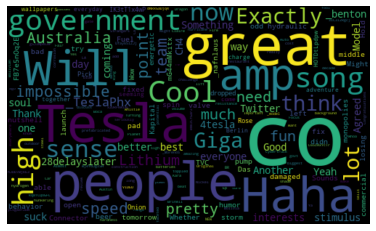

In [ ]:

# Plot The word Cloud
allWords = ' '.join([twts for twts in df["Tweets"]])
#allWords
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
myTuple = ("John", "Peter", "Vicky")

x = "#".join(myTuple)      # Combile all words in a sinle string with "#"

print(x)

John#Peter#Vicky


In [ ]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return "Negative"

  elif score ==0:
    return "Neutral"

  else:
    return "Positive"

df["Analysis"] = df["Polarity"].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Fuel spin valve didn’t open. Will fix &amp; t...,0.375000,-0.083333,Negative
1,I was just out at the launch pad. Connector d...,0.412500,0.300000,Positive
2,"Whether commercial or government, monopolies ...",0.333333,-0.350000,Negative
3,Sounds great,0.750000,0.800000,Positive
4,_nafnlaus Haha,0.300000,0.200000,Positive
...,...,...,...,...
95,"Human overseen at first, then fully self-driving",0.216667,0.125000,Positive
96,"Can’t say, but it involves a 🐻",0.000000,0.000000,Neutral
97,_10 🔥🔥,0.000000,0.000000,Neutral
98,🤣,0.000000,0.000000,Neutral


In [ ]:
# Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=["Polarity"])     #df will sort according to Polarity values from nmost negetive to positive
#print(sortedDF.shape, sortedDF)

for i in range(0, sortedDF.shape[0]):
  if(sortedDF["Analysis"][i] == "Positive"):
    print(str(j) + ")" +sortedDF["Tweets"][i])
    print()
    j += 1

1) I was just out at the launch pad. Connector damaged in the storm, but fixed now. Might be able to… s//t.co/FB7e5nOq2E

2) Sounds great

3)_nafnlaus  Haha

4)17 What I like most is their great sense of humor

5)  Exactly

6) Once an Onion, now a Rose

7)  Wow, you think about me a lot!

8) Haha

9) Pick up the energetic wallpapers, and charge your everyday adventure！ s//t.co/HOTDtLpdpw

10)Almost a decade ago. Original Dragon in background.

11) Fair point! Will discuss with team.

12) He was amazing

13)Great song
s//t.co/wj4YdJglSH

14) That’s me! Haha

15) This has a lot of potential. Lithium is pretty much everywhere.

16) Whoa cool

17)  We need high Brinell hardness &amp; high corrosion resistance. Because of Cybertruck’s faceted… s//t.co/dNkkGaDjq4

18)   I really want to do this! Will be great fun. Could be both LA and Austin.

19) Cool

20)_TeslaPhx @28delayslater  97 _benton 4tesla Not impossible

21) NEW VIDEO - Why Tesla Model Y is Their Most Important Car! [Auto Focus Ep

In [ ]:
# print the negative Tweets
sortedDF = df.sort_values(by=["Polarity"], ascending="False")
#sortedDF
j=1
for i in range(0, sortedDF.shape[0]):
  if (sortedDF["Analysis"][i] == "Negative"):
    print(str(j) + ")" +sortedDF["Tweets"][i])
    print()
    j += 1

1) Fuel spin valve didn’t open. Will fix &amp; try again tomorrow. Also, some odd TVC hydraulic pump behavior.

2) Whether commercial or government, monopolies are bad for the people

3) Some of whom seriously think Tesla toppled the Bolivian govt (sigh) s//t.co/yC5gaa12DW

4)   Yeah, we’re hunkering down here until the hurricane passes

5)_feed [slow drag on cigarette) Facebook? Haven’t heard that name in years …

6)🌹 Twitter sucks

7) Competition ensures companies work hard to serve the needs of their customers

8) Tbh, we are just a bit less foolish than before

9) No, best to have people seated for safety &amp; speed of travel



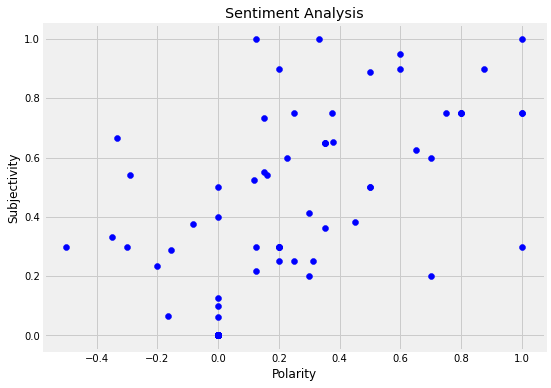

In [ ]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color="Blue")

plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [ ]:
# Get the percentage of positive Tweets
ptweets = df[df.Analysis == "Positive"]
#ptweets
ptweets = ptweets["Tweets"]
#len(ptweets)
round((ptweets.shape[0] / df.shape[0] )*100, 1)     # Round upto 1 decimal place

44.0

In [ ]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == "Negative"]
ntweets = ntweets["Tweets"]
round((ntweets.shape[0] / df.shape[0] * 100), 1)

9.0

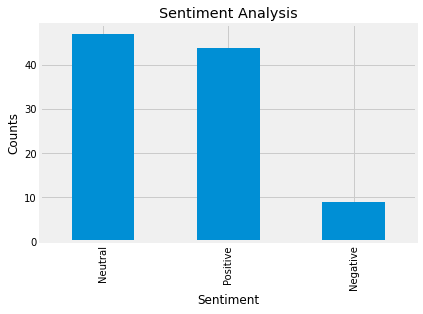

In [ ]:
# Show the value counts
df["Analysis"].value_counts()

# plot and visualize the counts
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df["Analysis"].value_counts().plot(kind = "bar")